<a href="https://colab.research.google.com/github/sohamgeek/bmllca/blob/main/bml_lca_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Decision Tree Accuracy: 90.17%


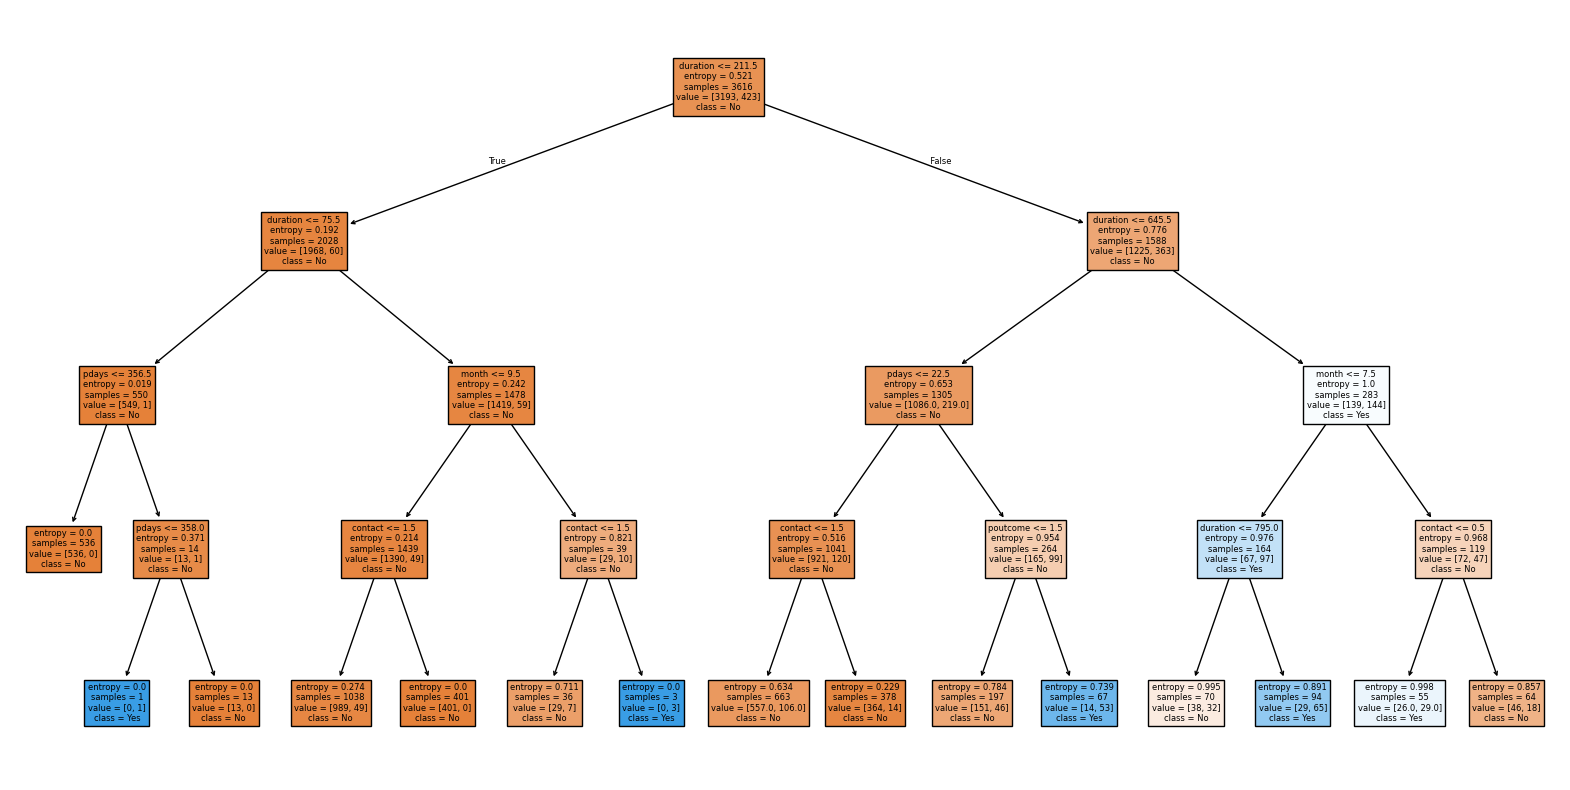

'decision_tree.pdf'

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz

# Load dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.csv"
data = pd.read_csv("/content/bank.csv", sep=";")

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target variable
X = data.drop("y", axis=1)  # Features
y = data["y"]  # Target (converted to 0/1)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {accuracy * 100:.2f}%")

# Visualize Decision Tree using plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()

# Export tree in Graphviz format
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves tree as 'decision_tree.pdf'
graph.view()
